In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("breast-cancer.csv")
df = shuffle(df)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
101,862722,0,6.981,13.43,43.79,143.5,0.11700,0.07568,0.000000,0.000000,...,7.93,19.54,50.41,185.2,0.1584,0.12020,0.000000,0.00000,0.2932,0.09382
259,88725602,1,15.530,33.56,103.70,744.9,0.10630,0.16390,0.175100,0.083990,...,18.49,49.54,126.30,1035.0,0.1883,0.55640,0.570300,0.20140,0.3512,0.12040
276,8911230,0,11.330,14.16,71.79,396.6,0.09379,0.03872,0.001487,0.003333,...,12.20,18.99,77.37,458.0,0.1259,0.07348,0.004955,0.01111,0.2758,0.06386
190,874858,1,14.220,23.12,94.37,609.9,0.10750,0.24130,0.198100,0.066180,...,15.74,37.18,106.40,762.4,0.1533,0.93270,0.848800,0.17720,0.5166,0.14460
346,898678,0,12.060,18.90,76.66,445.3,0.08386,0.05794,0.007510,0.008488,...,13.64,27.06,86.54,562.6,0.1289,0.13520,0.045060,0.05093,0.2880,0.08083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,91789,0,11.260,19.83,71.30,388.1,0.08511,0.04413,0.005067,0.005664,...,11.93,26.43,76.38,435.9,0.1108,0.07723,0.025330,0.02832,0.2557,0.07613
521,91762702,1,24.630,21.60,165.50,1841.0,0.10300,0.21060,0.231000,0.147100,...,29.92,26.93,205.70,2642.0,0.1342,0.41880,0.465800,0.24750,0.3157,0.09671
62,858986,1,14.250,22.15,96.42,645.7,0.10490,0.20080,0.213500,0.086530,...,17.67,29.51,119.10,959.5,0.1640,0.62470,0.692200,0.17850,0.2844,0.11320
108,86355,1,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.426400,0.182300,...,28.40,28.01,206.80,2360.0,0.1701,0.69970,0.960800,0.29100,0.4055,0.09789


In [3]:
df.shape

(569, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 101 to 506
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se            

In [5]:
df.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,30371831.43,1.250206e+08,8670.00,869218.00,906024.00,8813129.00,9.113205e+08
diagnosis,569.0,0.37,4.800000e-01,0.00,0.00,0.00,1.00,1.000000e+00
radius_mean,569.0,14.13,3.520000e+00,6.98,11.70,13.37,15.78,2.811000e+01
texture_mean,569.0,19.29,4.300000e+00,9.71,16.17,18.84,21.80,3.928000e+01
perimeter_mean,569.0,91.97,2.430000e+01,43.79,75.17,86.24,104.10,1.885000e+02
area_mean,569.0,654.89,3.519100e+02,143.50,420.30,551.10,782.70,2.501000e+03
smoothness_mean,569.0,0.10,1.000000e-02,0.05,0.09,0.10,0.11,1.600000e-01
compactness_mean,569.0,0.10,5.000000e-02,0.02,0.06,0.09,0.13,3.500000e-01
concavity_mean,569.0,0.09,8.000000e-02,0.00,0.03,0.06,0.13,4.300000e-01
concave points_mean,569.0,0.05,4.000000e-02,0.00,0.02,0.03,0.07,2.000000e-01


In [6]:
# Break up data into chunks for visualization and correlation
num1 = [
       'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
      ]
num2 = [
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'
      ]

In [7]:
pp1 = [
        'diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
        'area_mean', 'smoothness_mean', 'compactness_mean',
      ]
pp2 = [
        'diagnosis', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
        'fractal_dimension_mean', 'radius_se', 'texture_se',
        'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       ]
pp3 = [
        'diagnosis','concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst'
      ]
pp4 = [
        'diagnosis','smoothness_worst',
        'compactness_worst', 'concavity_worst', 'concave points_worst',
        'symmetry_worst', 'fractal_dimension_worst'
        ]


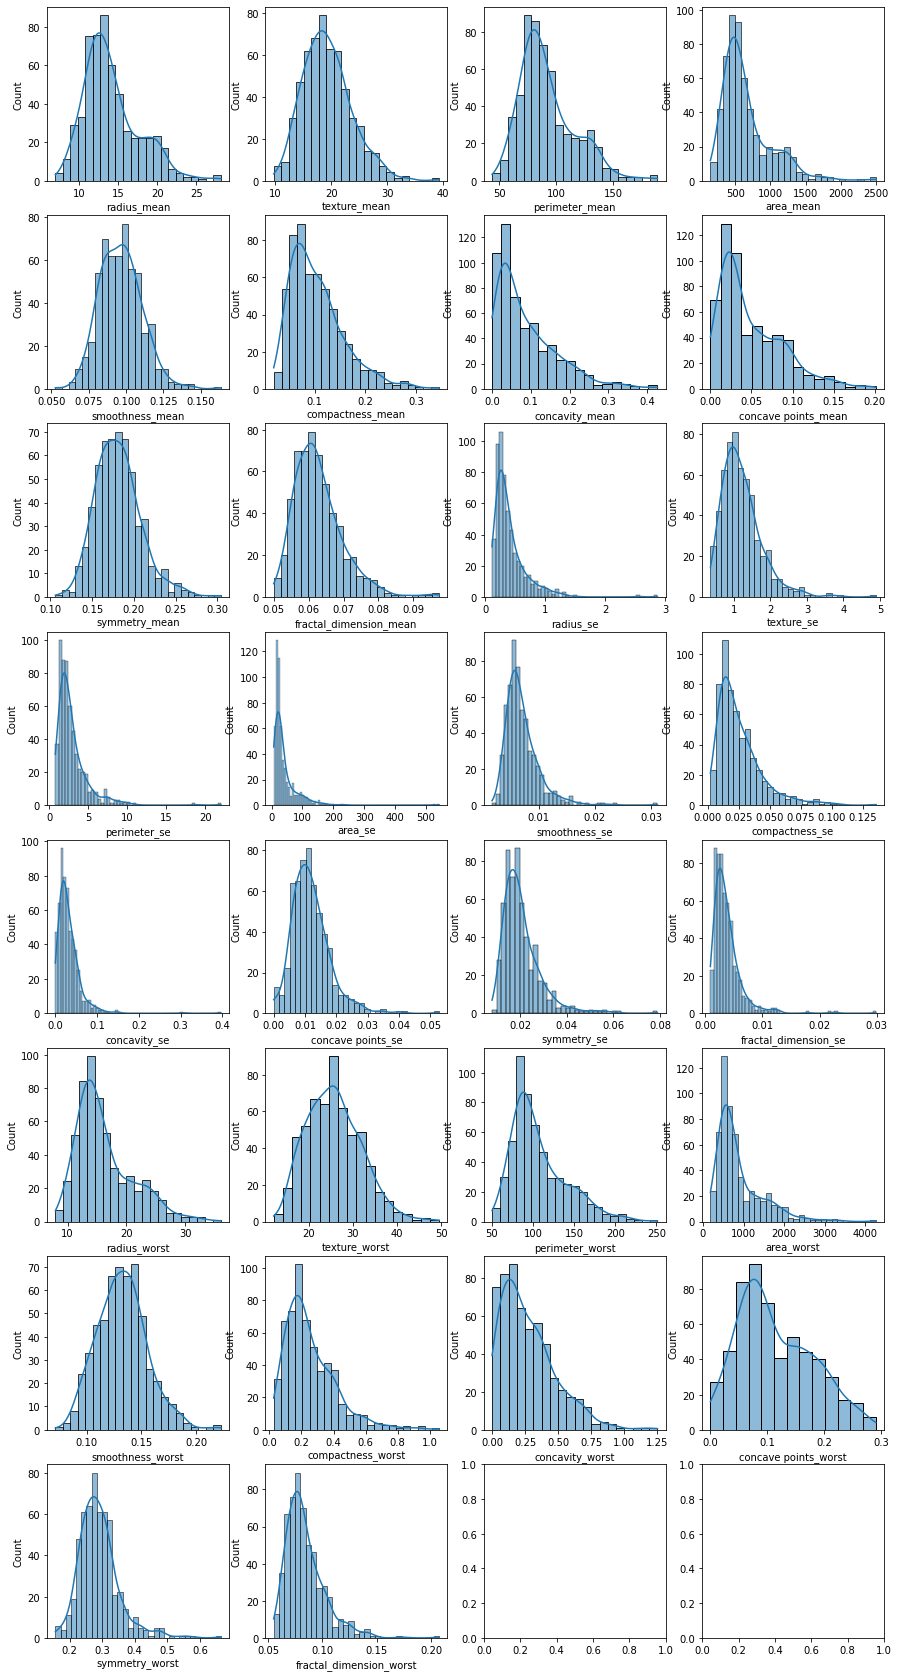

In [8]:
# select the columns to be plotted
cols = df.iloc[:,2:]

# create the figure and axes
fig, axes = plt.subplots(8, 4)
fig.set_size_inches(15, 30)  # ( x , y )
axes = axes.ravel()  # flattening the array makes indexing easier
for col, ax in zip(cols, axes):
    sns.histplot(data=df[col], kde=True, ax = ax)

plt.show()

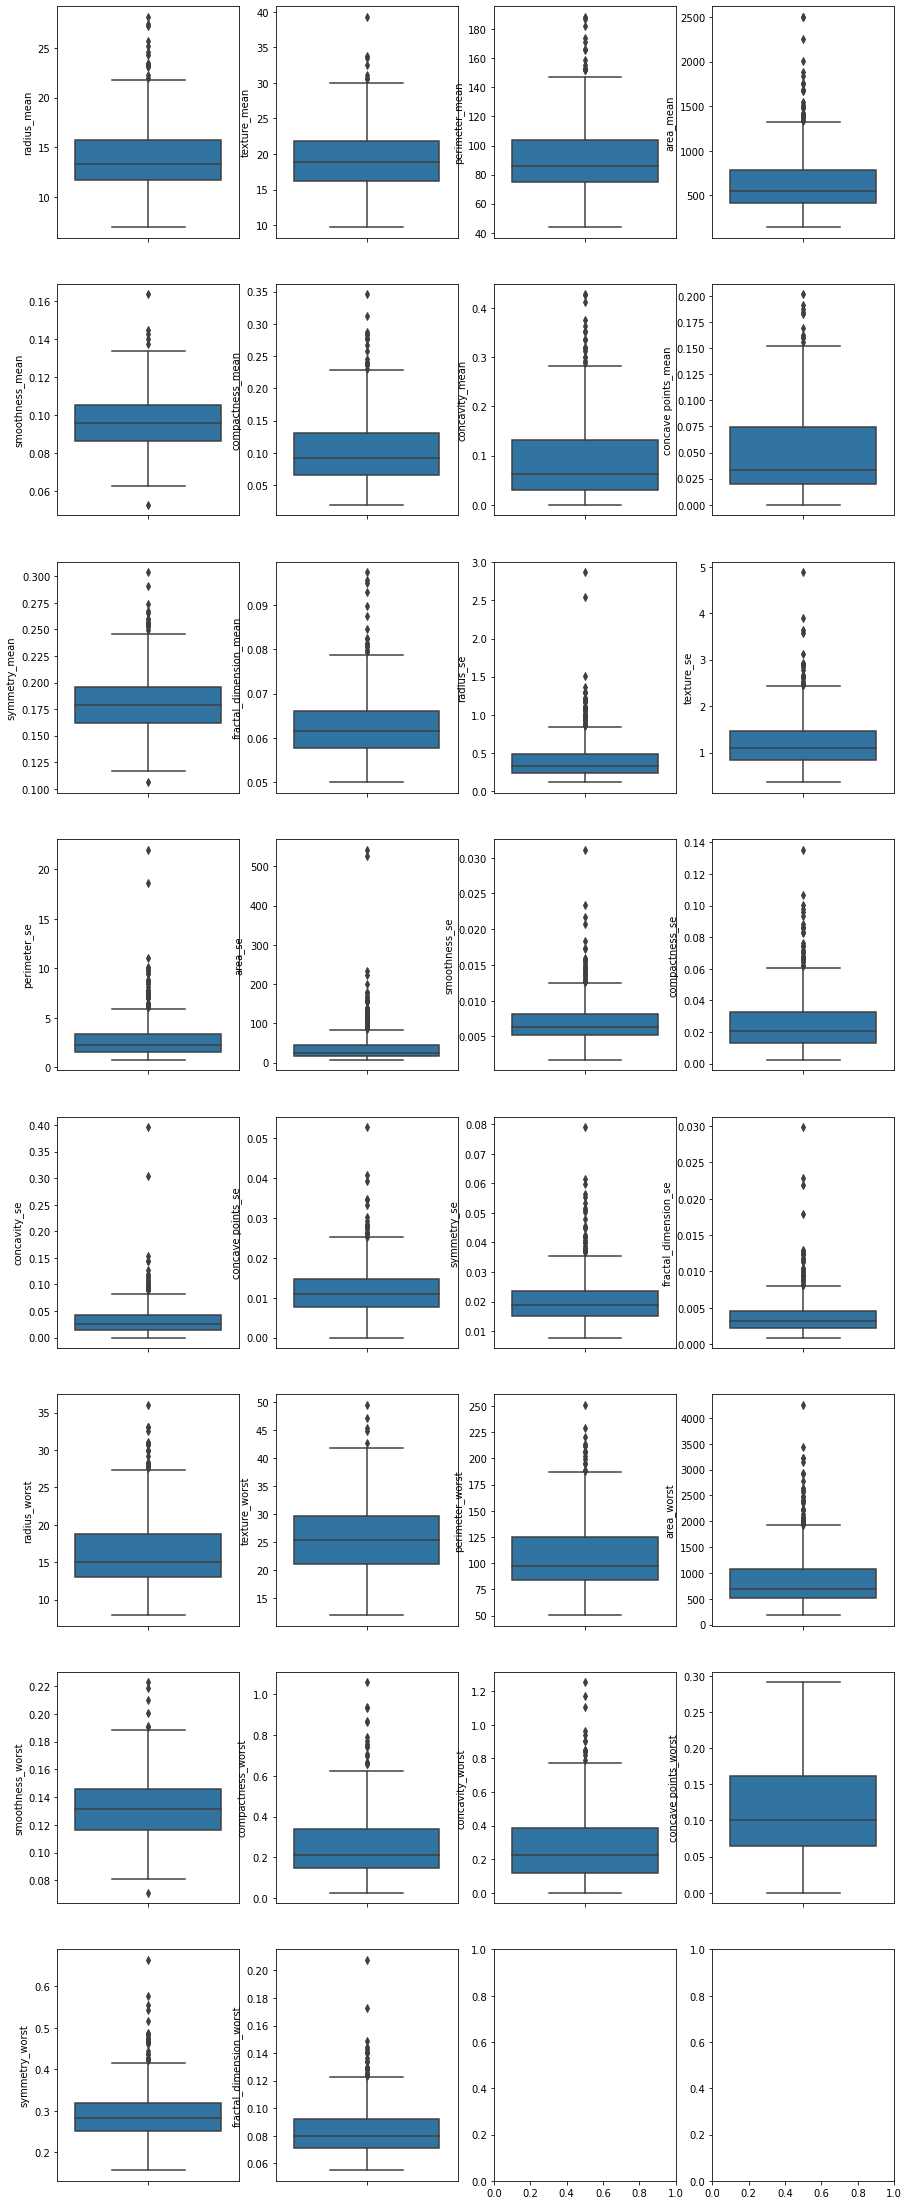

In [9]:
# select the columns to be plotted
cols = df.iloc[:,2:]

# create the figure and axes
fig, axes = plt.subplots(8, 4)
axes = axes.ravel()  # flattening the array makes indexing easier
fig.set_size_inches(15, 40)  # ( x , y )
for col, ax in zip(cols, axes):
    sns.boxplot(ax =ax,y=df[col])

plt.show()

In [10]:
# Calculate IQR
q75, q25 = np.percentile(df['area_worst'], [75 ,25])
IQR = q75 - q25

# Calculate lower and upper bounds
lower_bound = q25 - (IQR * 1.5)
upper_bound = q75 + (IQR * 1.5)

# Select rows that are outside the bounds
df_outliers = df.query('area_worst < @lower_bound or area_worst > @upper_bound')
df_outliers # 35 outliers

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
250,884948,1,20.94,23.56,138.9,1364.0,0.10070,0.16060,0.2712,0.13100,...,25.58,27.00,165.3,2010.0,0.1211,0.3172,0.6991,0.2105,0.3126,0.07849
449,911157302,1,21.10,20.52,138.1,1384.0,0.09684,0.11750,0.1572,0.11550,...,25.68,32.07,168.2,2022.0,0.1368,0.3101,0.4399,0.2280,0.2268,0.07425
503,915143,1,23.09,19.83,152.1,1682.0,0.09342,0.12750,0.1676,0.10030,...,30.79,23.87,211.5,2782.0,0.1199,0.3625,0.3794,0.2264,0.2908,0.07277
164,8712289,1,23.27,22.04,152.1,1686.0,0.08439,0.11450,0.1324,0.09702,...,28.01,28.22,184.2,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187
369,9012000,1,22.01,21.90,147.2,1482.0,0.10630,0.19540,0.2448,0.15010,...,27.66,25.80,195.0,2227.0,0.1294,0.3885,0.4756,0.2432,0.2741,0.08574
300,892438,1,19.53,18.90,129.5,1217.0,0.11500,0.16420,0.2197,0.10620,...,25.93,26.24,171.1,2053.0,0.1495,0.4116,0.6121,0.1980,0.2968,0.09929
339,89812,1,23.51,24.27,155.1,1747.0,0.10690,0.12830,0.2308,0.14100,...,30.67,30.73,202.4,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738
82,8611555,1,25.22,24.91,171.5,1878.0,0.10630,0.26650,0.3339,0.18450,...,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
219,88119002,1,19.53,32.47,128.0,1223.0,0.08420,0.11300,0.1145,0.06637,...,27.90,45.41,180.2,2477.0,0.1408,0.4097,0.3995,0.1625,0.2713,0.07568
461,911296202,1,27.42,26.27,186.9,2501.0,0.10840,0.19880,0.3635,0.16890,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427


In [11]:
# Remove Outliers, Copy orig df before 
df_orig = df.copy()
num = num1 + num2
for i in num:
    q75, q25 = np.percentile(df.loc[:,i],[75,25])
    IQR = q75 - q25
    max = q75 + 1.5*IQR
    min = q25 - 1.5*IQR
    df.loc[df[i] > max, i] = df[i].mean()
    df.loc[df[i] < min, i] = df[i].mean()

In [12]:
# Select rows that are outside the bounds
df_outliers = df.query('area_worst < @lower_bound or area_worst > @upper_bound')
df_outliers # outliers removed


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [20]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
101,862722,0,6.981000,13.430000,43.790000,143.500000,0.11700,0.075680,0.000000,0.000000,...,7.93000,19.540000,50.410000,185.200000,0.1584,0.120200,0.000000,0.00000,0.293200,0.093820
259,88725602,1,15.530000,19.289649,103.700000,744.900000,0.10630,0.163900,0.175100,0.083990,...,18.49000,25.677223,126.300000,1035.000000,0.1883,0.556400,0.570300,0.20140,0.351200,0.120400
276,8911230,0,11.330000,14.160000,71.790000,396.600000,0.09379,0.038720,0.001487,0.003333,...,12.20000,18.990000,77.370000,458.000000,0.1259,0.073480,0.004955,0.01111,0.275800,0.063860
190,874858,1,14.220000,23.120000,94.370000,609.900000,0.10750,0.104341,0.198100,0.066180,...,15.74000,37.180000,106.400000,762.400000,0.1533,0.254265,0.272188,0.17720,0.290076,0.083946
346,898678,0,12.060000,18.900000,76.660000,445.300000,0.08386,0.057940,0.007510,0.008488,...,13.64000,27.060000,86.540000,562.600000,0.1289,0.135200,0.045060,0.05093,0.288000,0.080830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,91789,0,11.260000,19.830000,71.300000,388.100000,0.08511,0.044130,0.005067,0.005664,...,11.93000,26.430000,76.380000,435.900000,0.1108,0.077230,0.025330,0.02832,0.255700,0.076130
521,91762702,1,14.127292,21.600000,91.969033,654.889104,0.10300,0.210600,0.231000,0.147100,...,16.26919,26.930000,107.261213,880.583128,0.1342,0.418800,0.465800,0.24750,0.315700,0.096710
62,858986,1,14.250000,22.150000,96.420000,645.700000,0.10490,0.200800,0.213500,0.086530,...,17.67000,29.510000,119.100000,959.500000,0.1640,0.624700,0.692200,0.17850,0.284400,0.113200
108,86355,1,14.127292,19.670000,91.969033,654.889104,0.13260,0.104341,0.088799,0.048919,...,16.26919,28.010000,107.261213,880.583128,0.1701,0.254265,0.272188,0.29100,0.405500,0.097890


In [13]:
cor = df.corr().round(2)
cor.sort_values(['diagnosis'],ascending=False,inplace=True)
cor.diagnosis

diagnosis                  1.00
concave points_worst       0.79
perimeter_worst            0.79
radius_worst               0.78
concave points_mean        0.78
area_worst                 0.76
perimeter_mean             0.74
concavity_mean             0.74
area_mean                  0.72
radius_mean                0.72
area_se                    0.68
concavity_worst            0.68
radius_se                  0.58
compactness_worst          0.58
perimeter_se               0.58
compactness_mean           0.57
concave points_se          0.46
texture_worst              0.44
concavity_se               0.44
smoothness_worst           0.42
texture_mean               0.41
smoothness_mean            0.37
compactness_se             0.36
symmetry_worst             0.35
symmetry_mean              0.33
fractal_dimension_worst    0.29
fractal_dimension_se       0.19
id                         0.04
texture_se                 0.01
fractal_dimension_mean    -0.00
smoothness_se             -0.02
symmetry

In [14]:
cor2 = df_orig.corr().round(2)
cor2.sort_values(['diagnosis'],ascending=False,inplace=True)
cor2.diagnosis

diagnosis                  1.00
concave points_worst       0.79
perimeter_worst            0.78
concave points_mean        0.78
radius_worst               0.78
perimeter_mean             0.74
radius_mean                0.73
area_worst                 0.73
area_mean                  0.71
concavity_mean             0.70
concavity_worst            0.66
compactness_mean           0.60
compactness_worst          0.59
radius_se                  0.57
perimeter_se               0.56
area_se                    0.55
texture_worst              0.46
smoothness_worst           0.42
symmetry_worst             0.42
texture_mean               0.42
concave points_se          0.41
smoothness_mean            0.36
symmetry_mean              0.33
fractal_dimension_worst    0.32
compactness_se             0.29
concavity_se               0.25
fractal_dimension_se       0.08
id                         0.04
symmetry_se               -0.01
texture_se                -0.01
fractal_dimension_mean    -0.01
smoothne

## Modeling

In [23]:
# model_features = 'concave points_worst','perimeter_worst','radius_worst',\
#                  'concave points_mean','area_worst','perimeter_mean','concavity_mean',\
#                  'area_mean','radius_mean','area_se','concavity_worst','radius_se',\
#                  'compactness_worst','perimeter_se','compactness_mean'
            
model_features =   [ 'perimeter_worst','radius_worst',
                    'concave points_mean','area_worst','perimeter_mean','concavity_mean',
                    'area_mean','radius_mean','area_se','concavity_worst','radius_se',
                    'compactness_worst','perimeter_se','compactness_mean' 
                   ]

In [28]:
# Test Split
# X = df.loc[:,model_features]
# y = df.loc[:,'diagnosis']

X = df.iloc[:,4:9].values 
y = df.loc[:,'diagnosis'].values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [30]:
print('DType:\nX_train:{}, y_train:{}\nShape:\nX_train:{}, y_train:{}\nType:\nX_train:{}, y_train{}'
      .format(X_train.dtype,y_train.dtype,X_train.shape,y_train.shape,type(X_train),type(y_train)))

DType:
X_train:float64, y_train:int64
Shape:
X_train:(455, 5), y_train:(455,)
Type:
X_train:<class 'numpy.ndarray'>, y_train<class 'numpy.ndarray'>


### Logistic Regression

In [31]:
lgreg = LogisticRegression(max_iter=200)
lgreg.fit(X_train, y_train.ravel())
threshold = 0.5
# y_pred = lgreg.predict(X_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_train.dtype)
print(y_train.dtype)